In [11]:
import pandas as pd
import numpy as np
import requests
import json
import datetime as dt
import sys

sys.path.append('..')
from utils import load_database_table
from prepare_data import *

TODAY = dt.datetime.today().strftime('%Y-%m-%d %H:%M:%S')
#TODAY = '2024-01-30 00:00:00'
start_date = (dt.datetime.strptime(TODAY, '%Y-%m-%d %H:%M:%S') - dt.timedelta(hours=12)).strftime('%Y-%m-%d %H:%M:%S')

#SQL command to join budgets to adsets hourlies
req_1 = "SELECT * FROM adsets_hourlies AS a LEFT JOIN budget_changes AS b ON a.campaign_name = b.campaign_name and a.adset_datetime = b.datetime WHERE adset_datetime BETWEEN '"+start_date+"' AND '"+TODAY+"'"
#SQL command to fetch conversions data
req_2 = "SELECT hour, campaign_name, conversions FROM facebook_conversions AS fbc LEFT JOIN campaigns_dailies AS cd ON fbc.campaign_id = cd.campaign_id WHERE hour BETWEEN '"+start_date+"' AND '"+TODAY+"'"

df = load_database_table(None, req_1)
cdf = load_database_table(None, req_2)

Executing custom command: SELECT * FROM adsets_hourlies AS a LEFT JOIN budget_changes AS b ON a.campaign_name = b.campaign_name and a.adset_datetime = b.datetime WHERE adset_datetime BETWEEN '2024-02-13 00:04:33' AND '2024-02-13 12:04:33'
Executing custom command: SELECT hour, campaign_name, conversions FROM facebook_conversions AS fbc LEFT JOIN campaigns_dailies AS cd ON fbc.campaign_id = cd.campaign_id WHERE hour BETWEEN '2024-02-13 00:04:33' AND '2024-02-13 12:04:33'


c:\Users\samhu\projects\Trajectory Transformer\prepare_data.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['campaign_name'], inplace=True)


       adset_datetime          spend     ay_revenue  prebid_won_revenue  \
count    1.535310e+05  153531.000000  153531.000000       153531.000000   
mean     1.703992e+09       0.201131     411.893722          257.804606   
std      1.432471e+06       0.078475    1185.736083          747.863175   
min      1.701860e+09       0.000000       0.000000            0.000000   
25%      1.702717e+09       0.181291      52.000000           31.000000   
50%      1.703750e+09       0.205308     118.000000           73.000000   
75%      1.705237e+09       0.238561     282.000000          178.000000   
max      1.706573e+09       0.467832   58488.000000        32362.000000   

       dynamicAllocation_revenue_with_forecast  direct_revenue  video_revenue  \
count                            153531.000000   153531.000000  153531.000000   
mean                                 76.837336       77.478353      65.230859   
std                                 256.618552      271.698906     202.027118   


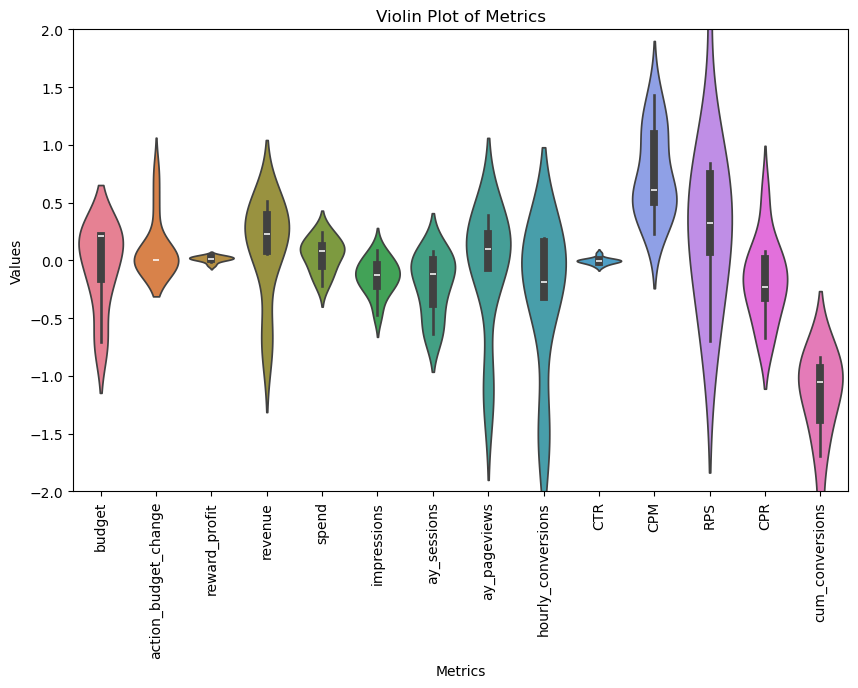

array([[[0.        , 1.        , 0.        , ..., 0.        ,
         0.03839293, 0.1393642 ],
        [0.        , 1.        , 0.        , ..., 0.75      ,
         0.00797646, 0.10097128],
        [0.        , 1.        , 0.        , ..., 0.        ,
         0.011951  , 0.09299482],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])

In [12]:
create_trajectories_file = 0
from prepare_data import *
#Remove duplicate columns
cols=pd.Series(df.columns)
for dup in cols[cols.duplicated()].unique():
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
df.columns=cols

#Drop na values from campaign_name
df.dropna(subset=['campaign_name'], inplace=True)
df = df[~df['campaign_name'].str.contains('-A1|test', regex=True)]

#Apply an optional filter to campaigns
specific_campaign = 'RockHoFNope03B-A7-EK-US-AND-RPS5-GS-1-gallery-U743-1706021099'
filtered_df = df[df['campaign_name'].str.contains(specific_campaign)]

seq, mask = create_trajectories_file(filtered_df, cdf, savepath_id='RockHoFNope03B', sequence_length=48, to_csv=True)

seq